# Table of Content

01. Import Libraries
02. Import Data
03. Data Preprocessing
04. The Elbow Technique
05. Silhouette Analysis
06. Gap Statistic Method
07. K-Means Clustering
08. Visualizations and Basic Descriptive Statistics
09. Discussion
10. Export Data

# 01. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler   # For data standardization
from sklearn.cluster import KMeans   # For K-Means clustering
from sklearn.metrics import silhouette_samples, silhouette_score   # For Silhouette analysis
from sklearn.metrics import pairwise_distances   # To calculate total within-cluster distance
import warnings

In [2]:
# Disable deprecation warnings that could indicate, for instance, a suspended library or feature. 
# These are more relevant to developers and very seldom to analysts.
warnings.filterwarnings('ignore')

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [4]:
# Adjust setting to allow seeing all the rows in the output of this notebook
pd.options.display.max_rows = None

In [5]:
# Adjust setting to allow seeing all the columns in the output of this notebook
pd.options.display.max_columns = None

# 02. Import Data

In [6]:
# Define the main project folder path
path = r'C:\Users\saich\Desktop\CareerFoundry\Data Immersion\Achievement 6 Advanced Analytics & Dashboard Design\11-2023 HDB Flat Resale Analysis'

In [7]:
# Import 'flat_resale_all_explored (geodata).pkl' from 'Prepared Data' folder
flat_resale = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'flat_resale_all_explored (geodata).pkl'))

In [8]:
flat_resale.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,row_id,address,latitude,longitude,geometry,nearest_station,station_distance,station_opening,station_closure,cpi_all_items,adjusted_resale_price,region,interchange_flag,storey_range_midpoint,adj_resale_price_category
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,9000.0,86,0,309 ANG MO KIO AVE 1,1.365517,103.843968,POINT (29185.176 38617.449),Ang Mo Kio MRT Station (NS16),790.831215,1987-11-07,NaT,62.0,14516.129032,North East,normal station,11,Low price
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977,6000.0,86,1,309 ANG MO KIO AVE 1,1.365517,103.843968,POINT (29185.176 38617.449),Ang Mo Kio MRT Station (NS16),790.831215,1987-11-07,NaT,62.0,9677.419355,North East,normal station,5,Low price
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,8000.0,86,2,309 ANG MO KIO AVE 1,1.365517,103.843968,POINT (29185.176 38617.449),Ang Mo Kio MRT Station (NS16),790.831215,1987-11-07,NaT,62.0,12903.225806,North East,normal station,11,Low price
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977,6000.0,86,3,309 ANG MO KIO AVE 1,1.365517,103.843968,POINT (29185.176 38617.449),Ang Mo Kio MRT Station (NS16),790.831215,1987-11-07,NaT,62.0,9677.419355,North East,normal station,8,Low price
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,47200.0,85,4,216 ANG MO KIO AVE 1,1.366197,103.841505,POINT (28911.052 38692.617),Ang Mo Kio MRT Station (NS16),986.842379,1987-11-07,NaT,62.0,76129.032258,North East,normal station,5,Low price


In [9]:
flat_resale.shape

(915371, 26)

# 03. Data Preprocessing

### 03.1 Remove Categorical Variables

In [10]:
flat_resale.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'row_id', 'address', 'latitude', 'longitude',
       'geometry', 'nearest_station', 'station_distance', 'station_opening',
       'station_closure', 'cpi_all_items', 'adjusted_resale_price', 'region',
       'interchange_flag', 'storey_range_midpoint',
       'adj_resale_price_category'],
      dtype='object')

In [11]:
# Since 'adjusted_resale_price' was derived from 'resale_price' and 'cpi_all_items', 
# therefore 'resale_price' and 'cpi_all_items' would not be included to prevent redundancy. 

# 'latitude' and 'longitude' are not included as they are used for calculating the 'station_distance'.

var_to_include = ['floor_area_sqm', 'remaining_lease', 'station_distance', 'storey_range_midpoint', 'adjusted_resale_price']

In [12]:
flat_resale_sub = flat_resale[var_to_include]

In [13]:
flat_resale_sub.shape

(915371, 5)

### 03.2 Standardization

In [14]:
# Define a standard scaler object
scaler = StandardScaler()

In [15]:
# Fit and transform data
flat_resale_sub_scaled = scaler.fit_transform(flat_resale_sub)

In [16]:
flat_resale_sub_scaled

array([[-2.5029452 ,  0.4529705 , -0.14539413,  0.69108171, -2.17314094],
       [-2.5029452 ,  0.4529705 , -0.14539413, -0.55699448, -2.20280351],
       [-2.5029452 ,  0.4529705 , -0.14539413,  0.69108171, -2.18302846],
       ...,
       [ 3.22288499, -1.71248502, -0.05751168,  0.06704361,  3.68103531],
       [ 3.22288499, -1.71248502, -0.05751168, -1.18103258,  2.92174557],
       [ 2.44912415, -1.71248502, -0.16274977, -0.55699448,  2.7834668 ]])

# 04. Elbow Technique

In [17]:
# Define the range of potential clusters in the data.
num_cl = range(1, 10)
wcss = []

for i in num_cl: 
    # Define k-means clusters in the range assigned above.
    kmeans = KMeans(n_clusters = i)
    # Each k-means algorithm is applied onto data
    kmeans.fit(flat_resale_sub_scaled)
    # We access the inertia_ attribute of the fitted KMeans object, which contains the WCSS value
    wcss.append(kmeans.inertia_)
    
wcss

# The Within-Cluster Sum of Squares (WCSS) is the sum of the squared distances between each data point and its assigned centroid within the clusters. 
# It is a measure of the compactness of the clusters formed by the KMeans algorithm.
# The higher the number of clusters, the lower the value of WCSS.

[4576855.000000013,
 3381829.4827684653,
 2819463.4956802223,
 2427461.4262114624,
 2108556.6770071755,
 1877775.2377873105,
 1745785.78460306,
 1641308.1536874403,
 1541855.5257606017]

Text(0, 0.5, 'WCSS')

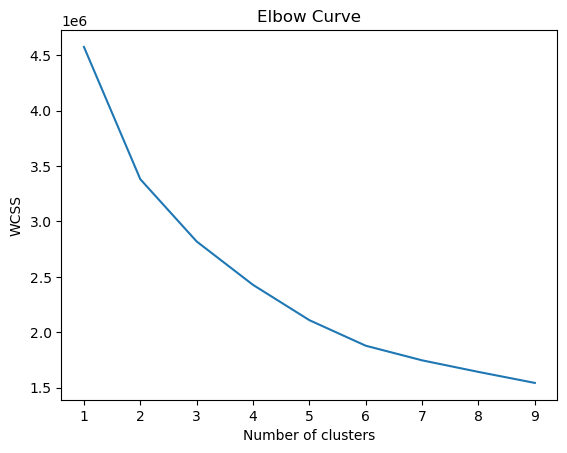

In [18]:
plt.plot(num_cl, wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

<b>Interpretation: </b><br>
From the elbow curve, it is inconclusive to determine the optimal number of clusters as there is no obvious elbow from the curve. <br>
Let's try with Silhouette analysis. 

# 05. Silhouette Analysis

In [19]:
# Define the range of number of clusters to evaluate
range_n_clusters = range(2, 11)

In [20]:
silhouette_avg_list = []

# Loop through different numbers of clusters to find the optimal one
for n_clusters in range_n_clusters:
    # Initialize the KMeans algorithm with n_clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    
    # Fit the algorithm to the data and predict the cluster labels
    cluster_labels = kmeans.fit_predict(flat_resale_sub_scaled)
    
    # Calculate the average silhouette score for the current number of clusters
    silhouette_avg = silhouette_score(flat_resale_sub_scaled, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is {silhouette_avg}")
    silhouette_avg_list.append(silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(flat_resale_sub_scaled, cluster_labels)
    
    # Create a figure to visualize the silhouette plot
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    
    # Set the limits for the x-axis and y-axis
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(flat_resale_sub_scaled) + (n_clusters + 1) * 10])
    
    y_lower = 10  # Initialize the starting point for the y-axis in the plot

    # Loop through each cluster to plot the silhouette scores
    for i in range(n_clusters):
        # Extract the silhouette scores for the current cluster
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        
        # Sort the silhouette scores for the current cluster
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]  # Get the size of the current cluster
        y_upper = y_lower + size_cluster_i  # Compute the upper bound for the current cluster plot
        
        # Choose a color for the current cluster's silhouette plot
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        
        # Fill the silhouette plot with the silhouette scores of the current cluster
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        # Label the silhouette plot with the cluster number
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # Update the lower bound for the next cluster's silhouette plot
        y_lower = y_upper + 10
    
    # Set the title and labels for the silhouette plot
    ax1.set_title(f"The silhouette plot for the various clusters for n_clusters = {n_clusters}")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    # Draw a vertical line for the average silhouette score of all samples
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # Remove yticks to clean up the plot
    ax1.set_yticks([]) 
    ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))
    
    # Display the plot
    plt.show()

KeyboardInterrupt: 

<b>Interpretation: </b><br>
Silhoutte analysis takes too long to run on whole dataset. Did try with 40% of dataset but it still takes too long to execute. <br>
Let's try with gap statistic method.

# 06. Gap Statistic Method

Optimal number of clusters: 2


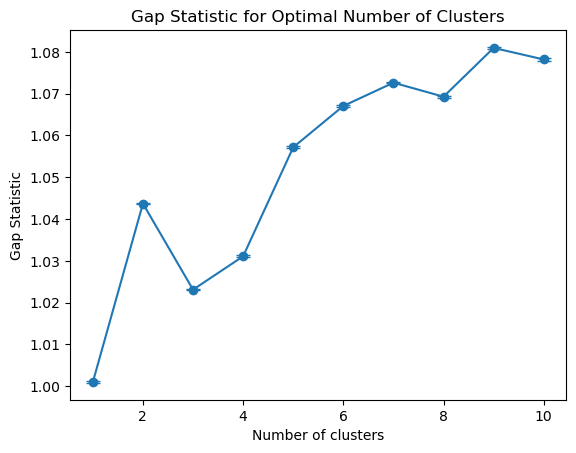

In [21]:
def generate_reference_data(data, n_refs):
    """
    Generate reference datasets by uniformly sampling within the bounds of the original dataset.
    
    Parameters:
    - data: numpy.ndarray, the original dataset
    - n_refs: int, number of reference datasets to generate
    
    Returns:
    - rands: numpy.ndarray, array containing the reference datasets
    """
    shape = data.shape
    tops = data.max(axis=0)  # Maximum value for each feature
    bots = data.min(axis=0)  # Minimum value for each feature
    
    # Generate uniformly distributed random points within the data bounds
    rands = np.random.random_sample(size=(shape[0], shape[1], n_refs))
    for i in range(n_refs):
        rands[:, :, i] = rands[:, :, i] * (tops - bots) + bots   # Scale and shift the random points to match the data's range

    return rands

def gap_statistic(data, n_refs=20, max_k=10):   # These are default values set, can be overwritten when calling the function
    """
    Compute the Gap Statistic for an input dataset and a range of cluster counts.
    
    Parameters:
    - data: numpy.ndarray, the dataset to be clustered
    - n_refs: int, number of reference datasets to generate
    - max_k: int, the maximum number of clusters to test
    
    Returns:
    - gaps: numpy.ndarray, the Gap values for each k
    - s_k: numpy.ndarray, the standard deviations for each k
    - optimal_k: int, the estimated optimal number of clusters
    """
    # Generate reference datasets
    rands = generate_reference_data(data, n_refs)
    
    # Initialize arrays to hold Gap values, standard deviations, and log within-cluster dispersions
    gaps = np.zeros(max_k)
    s_k = np.zeros(max_k)
    log_Wk = np.zeros(max_k)
    log_Wk_ref = np.zeros((max_k, n_refs))

    # Loop over each k (number of clusters) to compute the Gap Statistic
    for k in range(1, max_k + 1):
        # Fit KMeans to the original data and compute within-cluster dispersion Wk using pairwise distances
        kmeans = KMeans(n_clusters=k).fit(data)
        Wk = sum(np.min(pairwise_distances(data, kmeans.cluster_centers_), axis=1))
        log_Wk[k - 1] = np.log(Wk)   # Log-transform the within-cluster dispersion

        # Fit KMeans to the reference datasets and compute within-cluster dispersion Wk_ref using pairwise distances
        for i in range(n_refs):
            kmeans_ref = KMeans(n_clusters=k).fit(rands[:, :, i])
            Wk_ref = sum(np.min(pairwise_distances(rands[:, :, i], kmeans_ref.cluster_centers_), axis=1))
            log_Wk_ref[k - 1, i] = np.log(Wk_ref)   # Log-transform the within-cluster dispersion for the reference data

        # Calculate the Gap statistic
        gaps[k - 1] = np.mean(log_Wk_ref[k - 1, :]) - log_Wk[k - 1]   # Gap = mean(log(Wk*)) - log(Wk)
        s_k[k - 1] = np.std(log_Wk_ref[k - 1, :])   # Standard deviation of log(Wk*) for error bars

    # Determine the optimal number of clusters
    optimal_k = np.argmax(gaps) + 1   # Start with the k that has the maximum gap
    for k in range(1, max_k):
        if gaps[k - 1] >= gaps[k] - s_k[k]:
            optimal_k = k
            break

    return gaps, s_k, optimal_k

# Execute the functions above
data = flat_resale_sub_scaled  

# Compute the Gap Statistic with 10 reference datasets
gaps, s_k, optimal_k = gap_statistic(data, n_refs=10, max_k=10)

# Print the optimal number of clusters
print(f'Optimal number of clusters: {optimal_k}')

# Plot the Gap Statistic with error bars
plt.errorbar(range(1, 11), gaps, yerr=s_k, fmt='-o', capsize=5)
plt.xlabel('Number of clusters')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic for Optimal Number of Clusters')
plt.show()

In [23]:
gaps

array([1.00091748, 1.04371916, 1.02309872, 1.03088013, 1.05672684,
       1.06706396, 1.07246198, 1.06919048, 1.08089281, 1.07786965])

In [24]:
s_k

array([0.00021902, 0.00023557, 0.00027342, 0.00028375, 0.00026585,
       0.0001946 , 0.00015303, 0.00014623, 0.00015931, 0.00014406])

<b>Interpretation: </b><br>
The optimal number of clusters (k) is the smallest value of k such that the gap statistic is within one standard deviation of the gap at k+1: <br> 
Gap(k) ≥ Gap(k+1) − s(k+1) <br>

From the plot above, <b>the optimal number of clusters is 2</b> because: <br>
Gap(2) = 1.0437 <br>
Gap(3) = 1.0231 <br>
s(3) = 0.0003 <br>

Gap(2) ≥ Gap(3) − s(3) <br>
1.0437 ≥ 1.0231 - 0.0003 <br>
1.0437 ≥ 1.0228 

# 07. K-Means Clustering

In [25]:
# Create the k-means object with the optimal number of clusters.
kmeans = KMeans(n_clusters=2, random_state=2) 

In [26]:
# Fit the k-means object to the data.
kmeans.fit(flat_resale_sub_scaled)

KMeans(n_clusters=2, random_state=2)

In [27]:
# Create a column in the dataframe with values corresponding to which cluster every observation belongs.
flat_resale['clusters'] = kmeans.labels_

In [28]:
flat_resale.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,row_id,address,latitude,longitude,geometry,nearest_station,station_distance,station_opening,station_closure,cpi_all_items,adjusted_resale_price,region,interchange_flag,storey_range_midpoint,adj_resale_price_category,clusters
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,9000.0,86,0,309 ANG MO KIO AVE 1,1.365517,103.843968,POINT (29185.176 38617.449),Ang Mo Kio MRT Station (NS16),790.831215,1987-11-07,NaT,62.0,14516.129032,North East,normal station,11,Low price,0
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977,6000.0,86,1,309 ANG MO KIO AVE 1,1.365517,103.843968,POINT (29185.176 38617.449),Ang Mo Kio MRT Station (NS16),790.831215,1987-11-07,NaT,62.0,9677.419355,North East,normal station,5,Low price,0
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,8000.0,86,2,309 ANG MO KIO AVE 1,1.365517,103.843968,POINT (29185.176 38617.449),Ang Mo Kio MRT Station (NS16),790.831215,1987-11-07,NaT,62.0,12903.225806,North East,normal station,11,Low price,0
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977,6000.0,86,3,309 ANG MO KIO AVE 1,1.365517,103.843968,POINT (29185.176 38617.449),Ang Mo Kio MRT Station (NS16),790.831215,1987-11-07,NaT,62.0,9677.419355,North East,normal station,8,Low price,0
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,47200.0,85,4,216 ANG MO KIO AVE 1,1.366197,103.841505,POINT (28911.052 38692.617),Ang Mo Kio MRT Station (NS16),986.842379,1987-11-07,NaT,62.0,76129.032258,North East,normal station,5,Low price,0


In [29]:
flat_resale['clusters'].value_counts(dropna = False)

clusters
1    464957
0    450414
Name: count, dtype: int64

# 08. Visualizations and Basic Descriptive Statistics

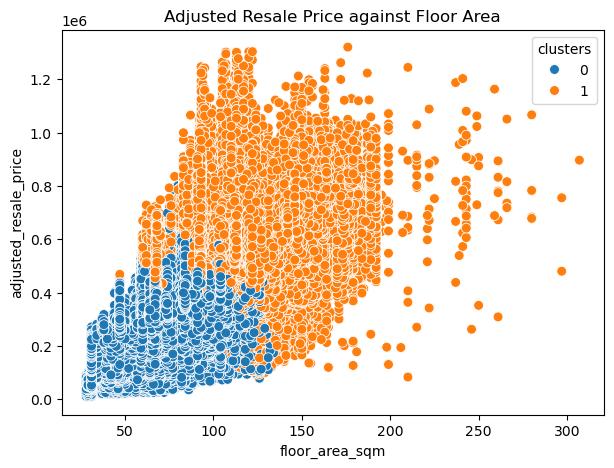

In [30]:
# Plot the clusters for the "adjusted_resale_price" and "floor_area_sqm" variables.

plt.figure(figsize = (7, 5))
clustering_price_vs_floor_area = sns.scatterplot(data=flat_resale, x='floor_area_sqm', y='adjusted_resale_price', 
                                                 hue='clusters', s=50) 
# 's' represents the size of the points you want to see in the plot.

plt.grid(False) # This removes the grid from the background.
plt.title('Adjusted Resale Price against Floor Area')
plt.xlabel('floor_area_sqm') # Label x-axis.
plt.ylabel('adjusted_resale_price') # Label y-axis.
plt.show()

In [31]:
# Export 'clustering_price_vs_floor_area'
clustering_price_vs_floor_area.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'clustering_price_vs_floor_area.png'), 
                                              bbox_inches='tight')

<b>Interpretation: </b><br>
- Blue cluster tends to be concentrated at bottom left corner, which has smaller floor area and lower adjusted resale price. 
- Orange cluster generally has larger floor area and higher adjusted resale price. 
- This aligns with the hypothesis where larger floor area tends to have higher adjusted resale price. 

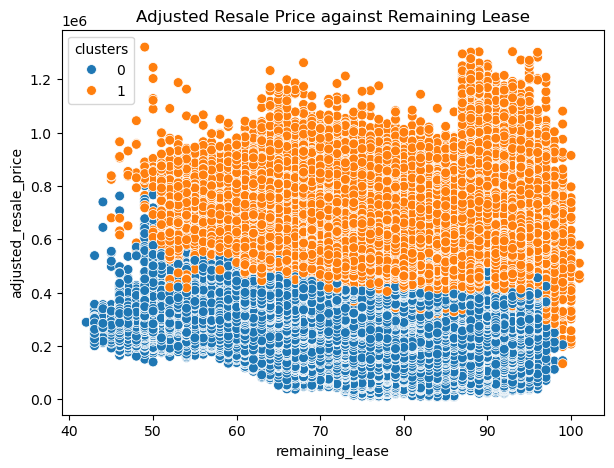

In [32]:
# Plot the clusters for the "adjusted_resale_price" and "remaining_lease" variables.

plt.figure(figsize = (7, 5))
clustering_price_vs_remaining_lease = sns.scatterplot(data=flat_resale, x='remaining_lease', y='adjusted_resale_price', 
                                                      hue='clusters', s=50) 
# 's' represents the size of the points you want to see in the plot.

plt.grid(False) # This removes the grid from the background.
plt.title('Adjusted Resale Price against Remaining Lease')
plt.xlabel('remaining_lease') # Label x-axis.
plt.ylabel('adjusted_resale_price') # Label y-axis.
plt.show()

In [33]:
# Export 'clustering_price_vs_remaining_lease'
clustering_price_vs_remaining_lease.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'clustering_price_vs_remaining_lease.png'), 
                                                   bbox_inches='tight')

<b>Interpretation: </b><br>
- Blue cluster clearly has lower adjusted resale price than orange cluster. 
- Both clusters span fully acorss the remaining lease range axis.

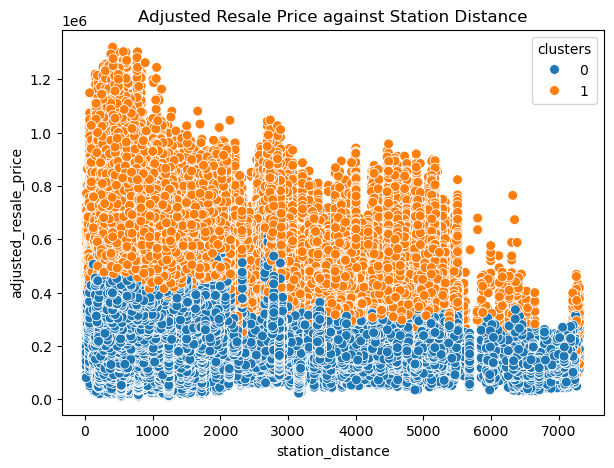

In [34]:
# Plot the clusters for the "adjusted_resale_price" and "station_distance" variables.

plt.figure(figsize = (7, 5))
clustering_price_vs_station_distance = sns.scatterplot(data=flat_resale, x='station_distance', y='adjusted_resale_price', 
                                                      hue='clusters', s=50) 
# 's' represents the size of the points you want to see in the plot.

plt.grid(False) # This removes the grid from the background.
plt.title('Adjusted Resale Price against Station Distance')
plt.xlabel('station_distance') # Label x-axis.
plt.ylabel('adjusted_resale_price') # Label y-axis.
plt.show()

In [35]:
# Export 'clustering_price_vs_station_distance'
clustering_price_vs_station_distance.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'clustering_price_vs_station_distance.png'), 
                                                    bbox_inches='tight')

<b>Interpretation: </b><br>
- Blue cluster clearly has lower adjusted resale price than orange cluster. 
- Both clusters span fully acorss the station distance axis.

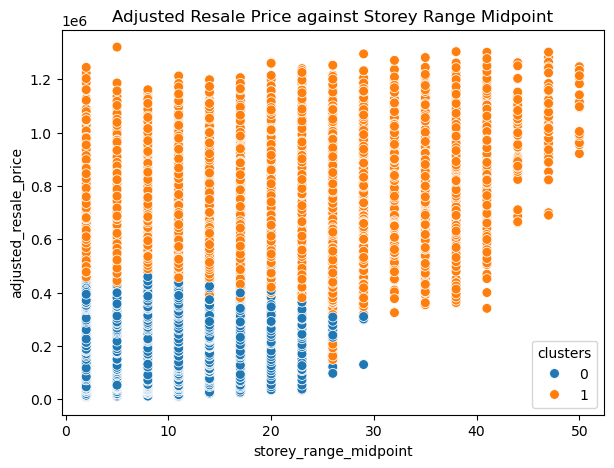

In [36]:
# Plot the clusters for the "adjusted_resale_price" and "storey_range_midpoint" variables.

plt.figure(figsize = (7, 5))
clustering_price_vs_storey_range_midpoint = sns.scatterplot(data=flat_resale, x='storey_range_midpoint', y='adjusted_resale_price', 
                                                       hue='clusters', s=50) 
# 's' represents the size of the points you want to see in the plot.

plt.grid(False) # This removes the grid from the background.
plt.title('Adjusted Resale Price against Storey Range Midpoint')
plt.xlabel('storey_range_midpoint') # Label x-axis.
plt.ylabel('adjusted_resale_price') # Label y-axis.
plt.show()

In [37]:
# Export 'clustering_price_vs_storey_range_midpoint'
clustering_price_vs_storey_range_midpoint.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'clustering_price_vs_storey_range_midpoint.png'), 
                                                         bbox_inches='tight')

<b>Interpretation: </b><br>
- Blue cluster clearly has lower adjusted resale price than orange cluster.
- Blue cluster has storey range midpoint of not higher than 30, while orange cluster spans fully acorss the storey range midpoint axis.

In [38]:
flat_resale.loc[flat_resale['clusters'] == 0, 'cluster'] = 'blue'
flat_resale.loc[flat_resale['clusters'] == 1, 'cluster'] = 'orange'

In [39]:
# Basic descriptive statistics for each cluster
flat_resale.groupby('cluster').agg({'floor_area_sqm':['mean', 'median'], 
                                    'remaining_lease':['mean', 'median'], 
                                    'station_distance':['mean', 'median'],
                                    'storey_range_midpoint':['mean', 'median'], 
                                    'adjusted_resale_price':['mean', 'median']})

floor_area_sqm        remaining_lease        station_distance  \
                  mean median            mean median             mean   
cluster                                                                 
blue         75.459612   73.0       76.211408   77.0       943.266517   
orange      115.298599  112.0       86.010616   88.0       878.627452   

                    storey_range_midpoint        adjusted_resale_price  \
             median                  mean median                  mean   
cluster                                                                  
blue     757.677391              6.727164    5.0         256650.018646   
orange   676.697838              8.598494    8.0         477855.595461   

                        
                median  
cluster                 
blue     254397.834912  
orange   457680.250784

<Axes: xlabel='cluster'>

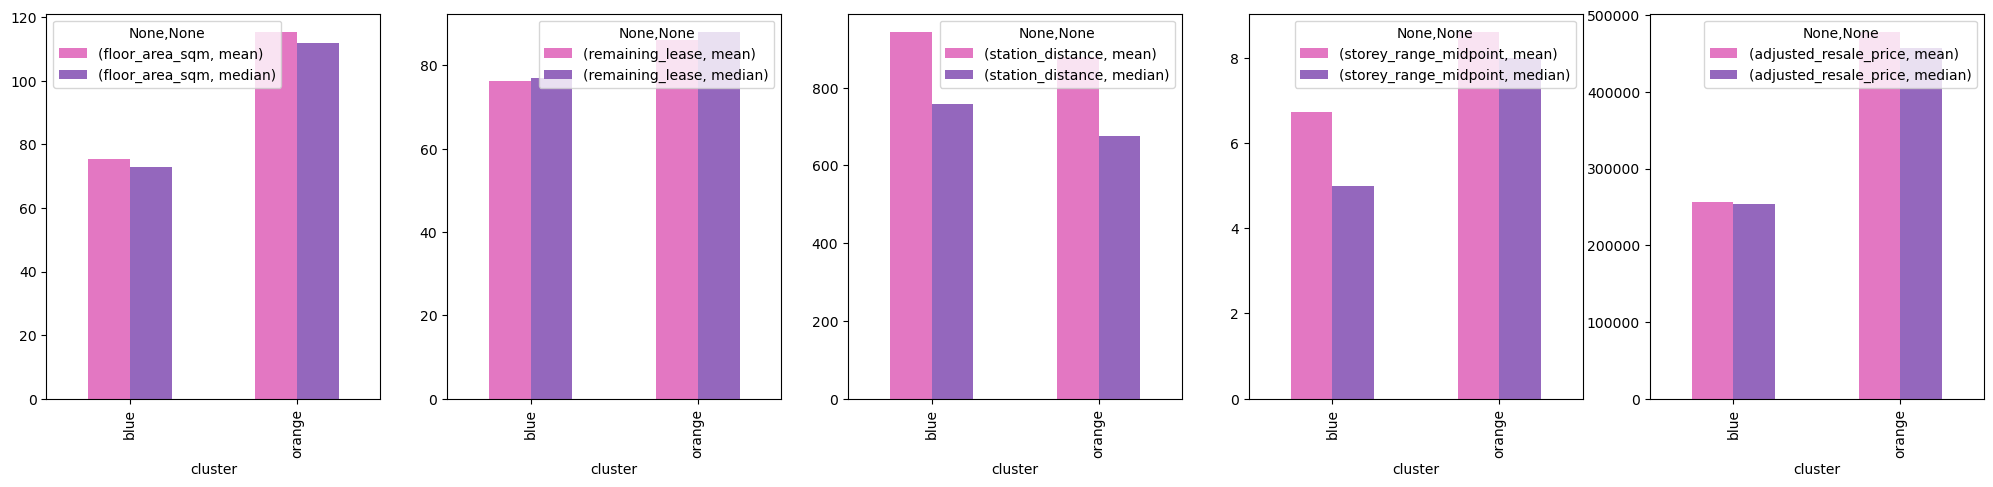

In [40]:
cluster_stats, ax = plt.subplots(1, 5, figsize=(25, 5))

flat_resale.groupby('cluster').agg({'floor_area_sqm': ['mean', 'median']}).plot.bar(color=['tab:pink', 'tab:purple'], ax=ax[0])
flat_resale.groupby('cluster').agg({'remaining_lease': ['mean', 'median']}).plot.bar(color=['tab:pink', 'tab:purple'], ax=ax[1])
flat_resale.groupby('cluster').agg({'station_distance': ['mean', 'median']}).plot.bar(color=['tab:pink', 'tab:purple'], ax=ax[2])
flat_resale.groupby('cluster').agg({'storey_range_midpoint': ['mean', 'median']}).plot.bar(color=['tab:pink', 'tab:purple'], ax=ax[3])
flat_resale.groupby('cluster').agg({'adjusted_resale_price': ['mean', 'median']}).plot.bar(color=['tab:pink', 'tab:purple'], ax=ax[4])

In [41]:
# Export 'cluster_stats'
cluster_stats.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cluster_stats.png'), 
                             bbox_inches='tight')

<b>Interpretation: </b><br>
- In average, the orange cluster is better than blue cluster in terms of flat conditions.   
  - Orange cluster has larger floor area.  
  - Orange cluster has slightly longer remaining lease. 
  - Orange cluster has slightly shorter station distance. 
  - Orange cluster has higher storey range midpoint. 
- With all these better conditions, orange cluster has higher adjusted resale price average than blue cluster. 
- These observations are aligned with the findings that found in previous exploring relationships section.

# 09. Discussion

From the previous exploring relationships section, we know that:  
1. The higher the floor area, the higher its adjusted resale price.
2. The adjusted resale price tends to increase when the distance to the nearest train station decreases, but no significant correlation for this. 
3. The adjusted resale price tends to increase when the storey range midpoint gets higher, but no significant correlation for this.
4. Remaining lease does not having any impact on the adjusted resale price.

The result of k-means clustering seems to support the first three points above. <br>
The only new finding is that the cluster with longer remaining lease has higher adjusted resale price in average, even this can't be seen from the plain scatterplot alone. 

# 10. Export Data

In [42]:
flat_resale.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,row_id,address,latitude,longitude,geometry,nearest_station,station_distance,station_opening,station_closure,cpi_all_items,adjusted_resale_price,region,interchange_flag,storey_range_midpoint,adj_resale_price_category,clusters,cluster
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,9000.0,86,0,309 ANG MO KIO AVE 1,1.365517,103.843968,POINT (29185.176 38617.449),Ang Mo Kio MRT Station (NS16),790.831215,1987-11-07,NaT,62.0,14516.129032,North East,normal station,11,Low price,0,blue
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977,6000.0,86,1,309 ANG MO KIO AVE 1,1.365517,103.843968,POINT (29185.176 38617.449),Ang Mo Kio MRT Station (NS16),790.831215,1987-11-07,NaT,62.0,9677.419355,North East,normal station,5,Low price,0,blue
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,8000.0,86,2,309 ANG MO KIO AVE 1,1.365517,103.843968,POINT (29185.176 38617.449),Ang Mo Kio MRT Station (NS16),790.831215,1987-11-07,NaT,62.0,12903.225806,North East,normal station,11,Low price,0,blue
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977,6000.0,86,3,309 ANG MO KIO AVE 1,1.365517,103.843968,POINT (29185.176 38617.449),Ang Mo Kio MRT Station (NS16),790.831215,1987-11-07,NaT,62.0,9677.419355,North East,normal station,8,Low price,0,blue
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,47200.0,85,4,216 ANG MO KIO AVE 1,1.366197,103.841505,POINT (28911.052 38692.617),Ang Mo Kio MRT Station (NS16),986.842379,1987-11-07,NaT,62.0,76129.032258,North East,normal station,5,Low price,0,blue


In [43]:
flat_resale.shape

(915371, 28)

In [44]:
# Export 'flat_resale' to 'Prepared Data' folder in pkl format
flat_resale.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'flat_resale_all_clustered (geodata).pkl'))